# Conhecendo a base de dados

## Importando os dados


In [58]:
import pandas as pd

In [59]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
pd.read_csv(url)

,Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Quitinete;Copacabana;1;0;0;40;1700;500;60
1,Casa;Jardim Botânico;2;0;1;100;7000;;
2,Conjunto Comercial/Sala;Barra da Tijuca;0;4;0;...
3,Apartamento;Centro;1;0;0;15;800;390;20
4,Apartamento;Higienópolis;1;0;0;48;800;230;
...,...
32955,Quitinete;Centro;0;0;0;27;800;350;25
32956,Apartamento;Jacarepaguá;3;1;2;78;1800;800;40
32957,Apartamento;São Francisco Xavier;2;1;0;48;1400...
32958,Apartamento;Leblon;2;0;0;70;3000;760;


In [60]:
#o arquivo csv importado acima, está utilizando o separador ';'.Como o padrão da função é a ',' devemos informar a ela.
# além do _csv pode-se usar os formatos _excel, _json, _html, _sql
dados = pd.read_csv(url,sep=';')

In [61]:
#função para visualizar o top da tabela, 5 primeiras linhas por padrão.Pode ser mudado informando o valor entre parênteses
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [62]:
#função para informar o fim da tabela, mesmas caracteristica da função de cima
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [63]:
#O tipo da variável é o DataFrame
type(dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [64]:
#saber o número de linhas e colunas
dados.shape

(32960, 9)

In [65]:
#retorna o titulo das colunas
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [66]:
# retorna o titulo das colunas, a quantidade de valores não nulos e o tipo da informação na coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [67]:
#retorna a coluna indicada
dados['Tipo']

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [68]:
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [69]:
#media de preçoes da coluna valor
dados['Valor'].mean()

12952.659715265761

In [70]:
'''
Só o groupby não imprime nada na tela, é preciso usar outra função em conjunto como o mean ou o sum
O pârametro passado para o groupby indica apartir de qual coluna se fará o agrupamento
Dependendo da versão do pandas utilizada, quando se aplica o mean pode ocorrer erros com relação ao tipo de dado das colunas.
Para que isso não ocorra se passa o pârametro numeric_only para o mean.
'''
dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


Esse método possui diversos parâmetros, alguns deles são:

by: esse é o parâmetro mais comum e é usado para especificar a coluna ou colunas que queremos agrupar. Como argumento dele, podemos passar o nome de uma coluna ou uma lista de nomes de colunas;

axis: utilizamos esse parâmetro para especificar o eixo ao longo do qual queremos agrupar. O valor padrão dele é 0, o que significa que as linhas serão agrupadas. Se quisermos agrupar as colunas, devemos definir esse parâmetro como 1;

sort: esse parâmetro é um booleano (True ou False) que indica se os grupos devem ser ordenados pelo valor da coluna de agrupamento. O valor padrão é True;

dropna: utilizamos esse parâmetro para controlar se os valores ausentes (NaN) serão excluídos ou não durante o processo de agrupamento. O valor padrão é True.
https://realpython.com/pandas-groupby/

https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb

In [71]:
#o colchetes antes do mean indica qual a coluna que eu quero visualizar
a = dados.groupby('Tipo')['Valor'].mean(numeric_only=True)
type(a)

pandas.core.series.Series

In [72]:
#os dois colchetes em valor muda o tipo da saida de serie para dataframe
b = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True)


<Axes: ylabel='Tipo'>

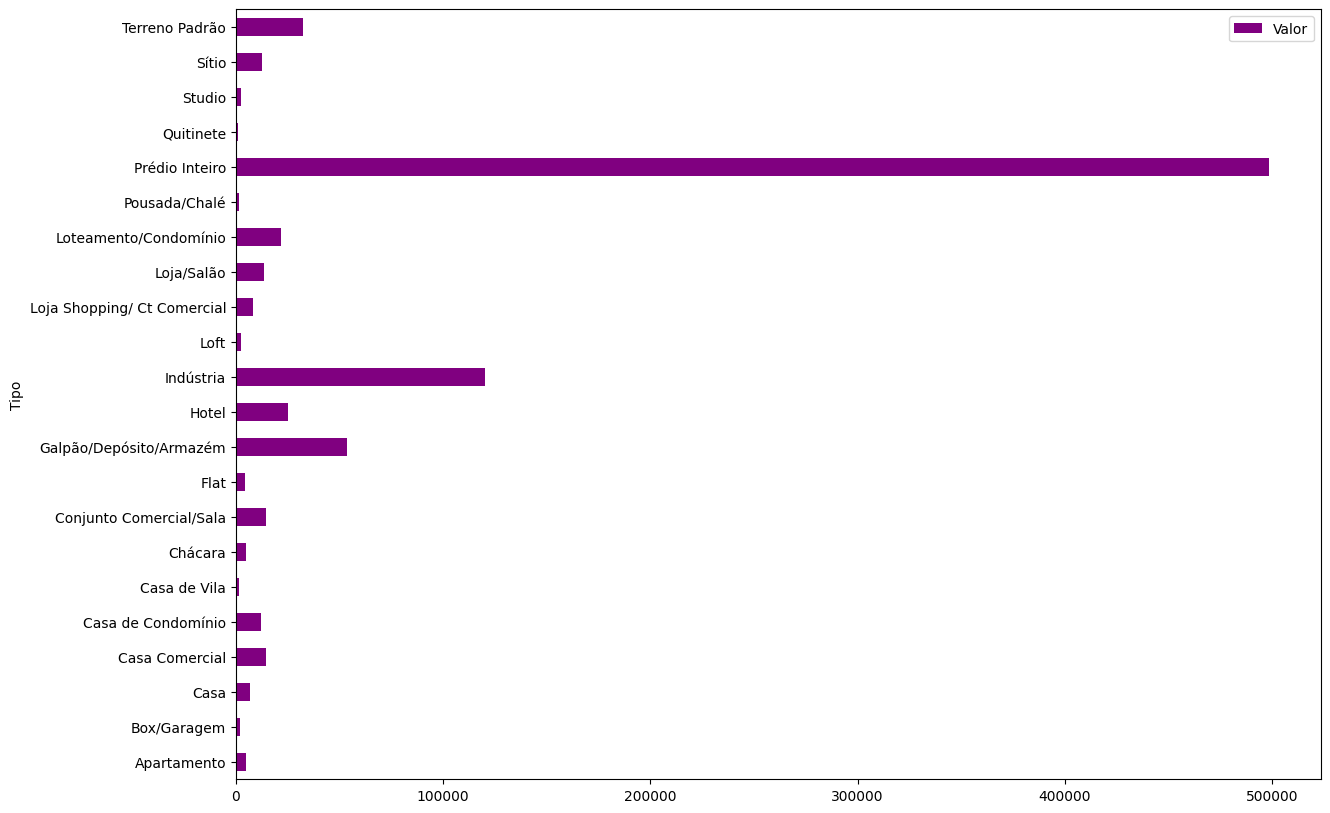

In [73]:
df_preco_tipo = b = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True)
df_preco_tipo.plot(kind='barh',figsize=(14,10),color='purple')

<Axes: ylabel='Tipo'>

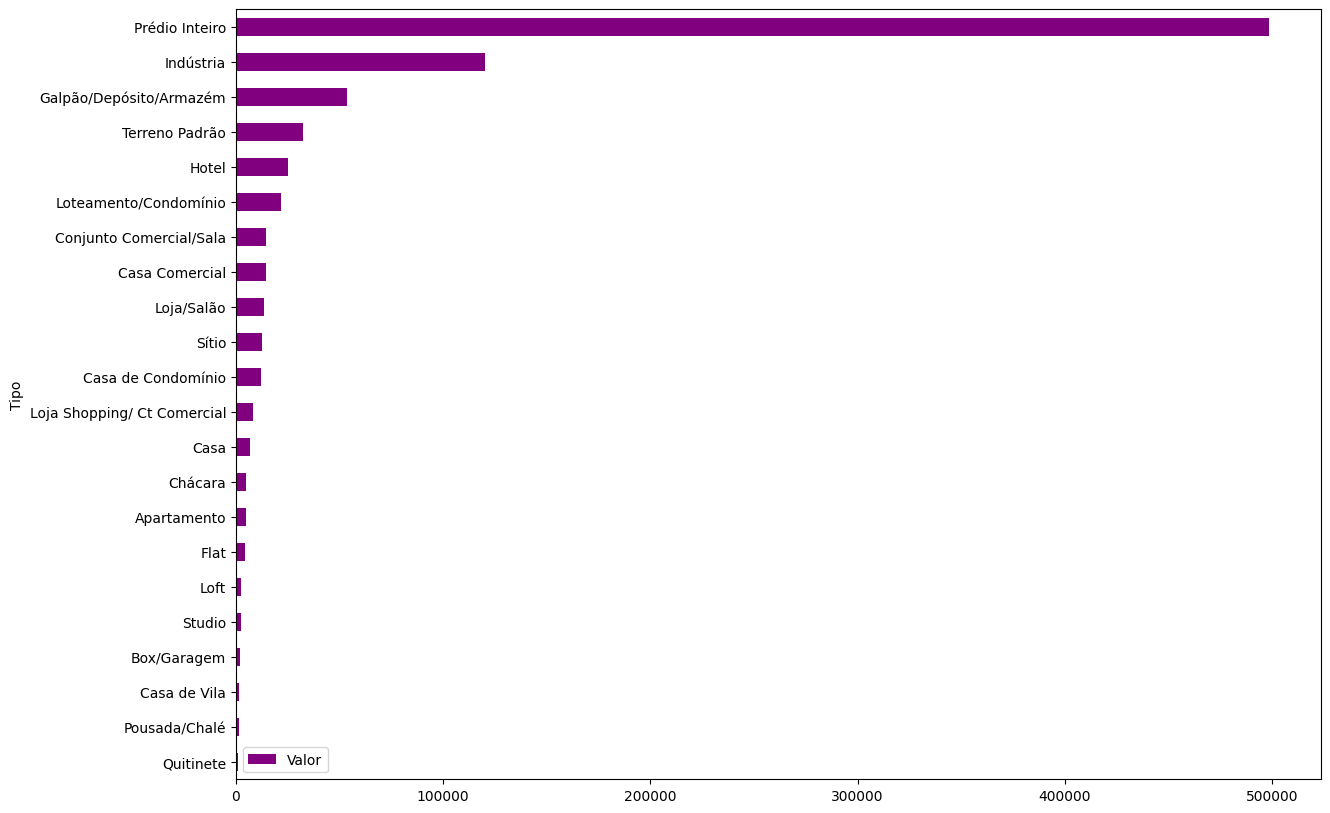

In [74]:
#para que o gráfico não fique desorganizado como o da célula acima usamos o sort_values e passamos o pârametro pelo qual se irá organizar
df_preco_tipo = b = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')
df_preco_tipo.plot(kind='barh',figsize=(14,10),color='purple')

## Removendo os imóveis comerciais

In [75]:
# .Tipo é outra maneira de selecionar a coluna sem usar os colchetes, depois usamos o unique() que retorna só os valores unicos da coluna
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [76]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [77]:
# a .query permite selecionar linhas especificas a partir de uma expressão. Para se indicar uma variável nessa expressão se usa o @
dados.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [78]:
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [79]:
dados_residencial = dados.query('@imoveis_comerciais not in Tipo')
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


<Axes: ylabel='Tipo'>

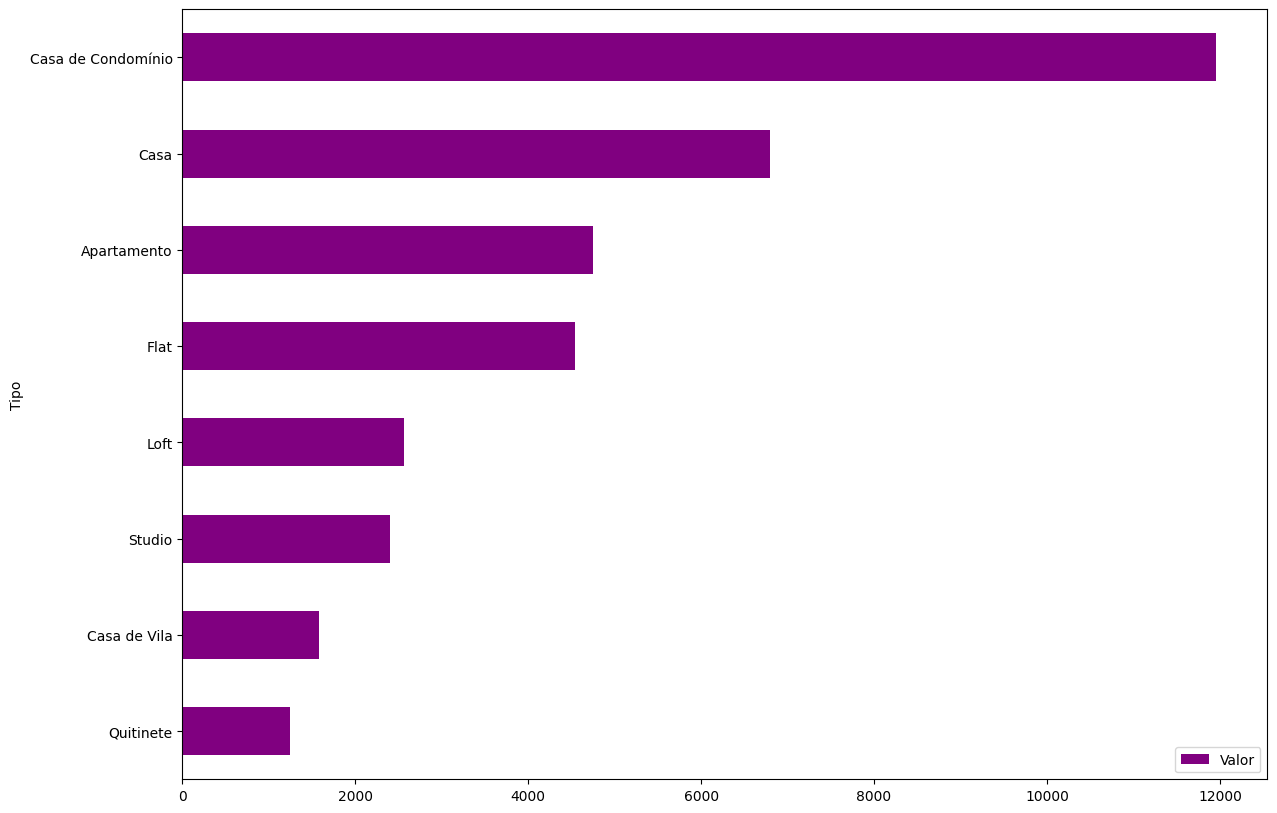

In [80]:
df_residencial = dados_residencial.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_residencial.plot(kind = 'barh', figsize = (14,10), color='purple')


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [81]:
# sem passar nenhum pârametro para o value_counts() ele retorna os valores absolutos da contagem
dados_residencial.Tipo.value_counts()

Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: Tipo, dtype: int64

In [82]:
#passando o pârametro normalize ele irá retornar os valores em porcentagem
dados_residencial.Tipo.value_counts(normalize=True)

Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: Tipo, dtype: float64

In [83]:
#converte a series em dataframe
dados_residencial.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,Tipo
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Tipo', ylabel='Percentual'>

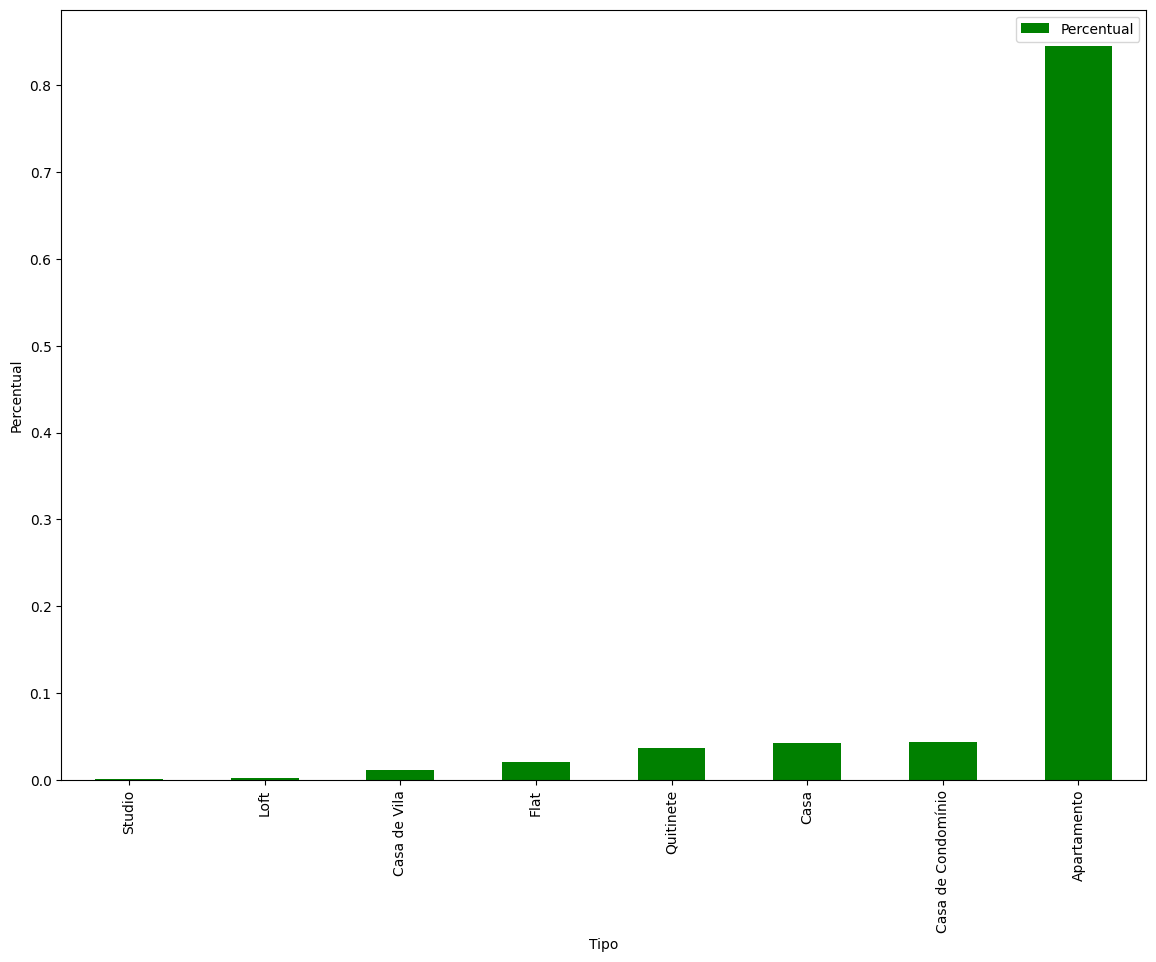

In [84]:
'''
  Na célula de cima a coluna onde estão os percentuais está nomeada como 'Tipo' é possivel modificar isso usando a função
rename(), o pârametro inplace=True substitui permanentemente.
'''
df_residencial_percentual = dados_residencial.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')
df_residencial_percentual.rename(columns={'Tipo':'Percentual'},inplace=True)
df_residencial_percentual.plot(kind='bar',figsize=(14,10),color='green',xlabel='Tipo',ylabel='Percentual')


### **Selecionando apenas os imóveis do tipo apartamento**

In [85]:
dados.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [86]:
df_residencial = dados.query('Tipo == "Apartamento"')
df_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


# Tratando e filtrando os dados

## Lidando com dados nulos

In [87]:
#retorna um dataframe boleano onde True é um valor não valido
df_residencial.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [88]:
# junto com o sum() retorna o somátorio de True's por coluna
df_residencial.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [89]:
# Como os valores não validos estão em colunas numericas, é só substitui-los por 0 com a função fillna(0)
df_residencial.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [90]:
df_residencial = df_residencial.fillna(0)

In [91]:
df_residencial.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

Remover os dados nulos: É possível remover as linhas ou colunas que possuem valores nulos utilizando o método dropna() . Esse método remove todas as linhas ou colunas que possuem pelo menos um valor nulo.

Preencher os dados nulos: Utilizando o método fillna(), podemos preencher os valores nulos com um valor específico. Além disso, também é possível utilizar argumentos específicos do método fillna() como o method=”ffill” ou method=”bfill” para preencher os valores nulos com o valor anterior ou posterior, respectivamente.

Interpolar os dados nulos: É possível utilizar o método interpolate() para preencher os valores nulos com valores interpolados, ou seja, valores calculados a partir dos valores vizinhos.

## Removendo registros

In [92]:
df_residencial.query('Valor == 0 | Condominio == 0 ')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [93]:
retirar = df_residencial.query('Valor == 0 | Condominio == 0 ').index

In [94]:
df_residencial.drop(retirar,axis=0,inplace=True)

In [95]:
df_residencial.query('Valor == 0 | Condominio == 0 ')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [96]:
df_residencial.Tipo.unique()

array(['Apartamento'], dtype=object)

In [97]:
df_residencial.drop('Tipo',axis=1,inplace=True)

In [98]:
df_residencial.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [99]:
df_residencial['Quartos'] == 1

3         True
4         True
6        False
11       False
12       False
         ...  
32951    False
32953    False
32956    False
32957    False
32958    False
Name: Quartos, Length: 18780, dtype: bool

In [100]:
selecao1 = df_residencial['Quartos'] == 1
df_residencial[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [101]:
selecao2 = df_residencial['Valor'] < 1200

In [102]:
selecao_final = (selecao1) & (selecao2)

In [103]:
df_filtro1 = df_residencial[selecao_final]

### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [104]:
selecao = (df_residencial['Quartos'] >= 2) & (df_residencial['Valor'] < 3000) & (df_residencial['Area'] > 70)

In [105]:
df_filtro2 = df_residencial[selecao]

## Salvando os dados

In [109]:
df_residencial.to_csv('dados_apts.csv')

In [110]:
pd.read_csv('dados_apts.csv')

,Unnamed: 0,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [111]:
#o index=False retira o indice do arquivo original
df_residencial.to_csv('dados_apts.csv',index=False)

In [112]:
pd.read_csv('dados_apts.csv')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [113]:
#o arquivo original estava com o separador ';' o pârametro sep define qual será o separador desse arquivo
df_residencial.to_csv('dados_apts.csv',index=False,sep=';')

In [114]:
#depois de salvar o arquivo com o separador ';' será preciso informa-lo na hora da leitura
pd.read_csv('dados_apts.csv')

,Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Centro;1;0;0;15;800.0;390.0;20.0
1,Higienópolis;1;0;0;48;800.0;230.0;0.0
2,Cachambi;2;0;0;50;1300.0;301.0;17.0
3,Grajaú;2;1;0;70;1500.0;642.0;74.0
4,Lins de Vasconcelos;3;1;1;90;1500.0;455.0;14.0
...,...
18775,Vila Valqueire;2;0;0;52;1000.0;550.0;0.0
18776,Méier;2;0;0;70;900.0;490.0;48.0
18777,Jacarepaguá;3;1;2;78;1800.0;800.0;40.0
18778,São Francisco Xavier;2;1;0;48;1400.0;509.0;37.0


In [115]:
pd.read_csv('dados_apts.csv',sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [117]:
df_filtro1.to_csv('dados_apts_filtro1.csv',index=False,sep=';')

In [120]:
pd.read_csv('dados_apts_filtro1.csv',sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
494,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Glória,1,0,0,46,1100.0,453.0,32.0
497,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [121]:
df_filtro2.to_csv('dados_apts_filtro2.csv',index=False,sep=';')

In [122]:
pd.read_csv('dados_apts_filtro2.csv',sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
4454,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


to_csv(): salva o DataFrame em um arquivo CSV (Comma-Separated Values);

to_excel(): salva o DataFrame em um arquivo Excel;

to_json(): salva o DataFrame em um arquivo JSON (JavaScript Object Notation).
https://pandas.pydata.org/docs/user_guide/io.html#io-tools-text-csv-hdf5

# Manipulando os dados

## Criando colunas numéricas

In [125]:
dados['valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [126]:
dados['valor_por_ano'] = 12*dados['valor_por_mes'] + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

In [127]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] +\
                     ' com ' + dados['Quartos'].astype(str) + 'quarto(s) e ' +\
                      dados['Vagas'].astype(str) + ' vaga(s) de garagem.'

In [128]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1quarto(s) e 0 vag...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2quarto(s) e 0 vag...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1quarto(s) e 0 vaga(...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1quarto(s) e 0...


In [138]:
#o apply é usado para aplicar uma função
dados['possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x >0 else 'Não')

In [139]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao,possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1quarto(s) e 0 vag...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2quarto(s) e 0 vag...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1quarto(s) e 0 vaga(...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1quarto(s) e 0...,Não


In [140]:
dados.to_csv('dados_completos_dev.csv',index=False,sep=';')

para criar colunas é possivel utilizar os seguintes metodos

Utilização do método assign() para criar uma nova coluna

Utilização do método apply() para aplicar uma função a uma coluna existente e criar uma nova coluna

https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html#how-to-create-new-columns-derived-from-existing-columns